In [7]:
import numpy as np
import matplotlib.pyplot  as plt

def rect(T):
    """create a centered rectangular pulse of width $T"""
    return lambda t: (-T/2 <= t) & (t < T/2)

def pulse_train(t, at, shape):
    """create a train of pulses over $t at times $at and shape $shape"""
    return np.sum(shape(t - at[:,np.newaxis]), axis=0)

sig = pulse_train(
    t=np.arange(100),              # time domain
    at=np.array([0, 10, 40, 80]),  # times of pulses
    shape=rect(10)                 # shape of pulse
)

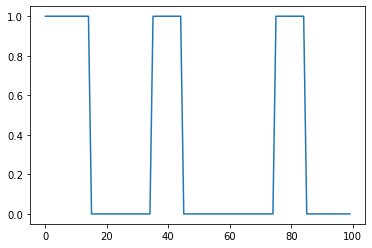

In [8]:
plt.plot(sig)

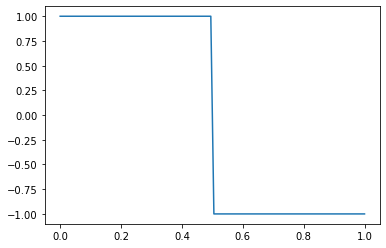

In [31]:
def system(x):
    """Implements a deterministic, static nonlinearity.

    Parameters
    ----------
    x : float or numpy.ndarray
        The systems input.

    Returns
    ------
    float or numpy.ndarray
        The corresponding system output.
    """
    y = np.ones_like(x)
    y[np.abs(x) < 0] = 0
    y[np.abs(x) > 0.5] = -1
    #y[np.abs(x) > 0.6] = 0
    return y

# sample support and compute system output
support = np.linspace(0, 1, 100)
true_output = system(support)
plt.plot(support,true_output)

In [37]:
a = np.append(np.zeros((50,1)),true_output)
a = np.append(a,np.zeros((50,1)))

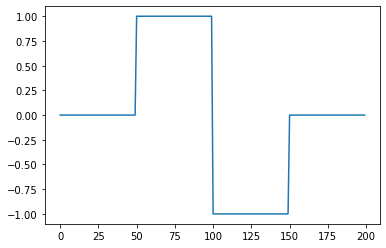

In [38]:
plt.plot(a)